<a href="https://colab.research.google.com/github/beyzoskaya/machineLearning_CS454/blob/main/homeworks/parametricClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [8]:
train_data = pd.read_csv("/content/data/training.csv", header=None,names=['Age', 'Class'])
test_data = pd.read_csv("/content/data/testing.csv", header=None,names=['Age', 'Class'])

In [9]:
train_data.head()

,Age,Class
0,47.363793,1
1,45.367702,1
2,43.694695,1
3,37.914666,1
4,44.416403,1


In [10]:
test_data.head()

,Age,Class
0,37.151208,1
1,46.497973,1
2,43.480627,1
3,41.482369,1
4,48.234631,1


In [11]:
class_counts = train_data['Class'].value_counts()
class_priors = class_counts/len(train_data)

In [12]:
class_priors

1    0.466667
2    0.333333
3    0.200000
Name: Class, dtype: float64

In [16]:
mean_class_1 = variance_class_1 = 0
mean_class_2 = variance_class_2 = 0
mean_class_3 = variance_class_3 = 0

class_1_data = train_data[train_data['Class'] == 1]
class_2_data = train_data[train_data['Class'] == 2]
class_3_data = train_data[train_data['Class'] == 3]

# Calculate mean and variance for class 1
age_values_1 = class_1_data['Age']
mean_class_1 = age_values_1.sum() / len(age_values_1)
variance_class_1 = ((age_values_1 - mean_class_1) ** 2).sum() / (len(age_values_1) - 1)

# Calculate mean and variance for Class 2
age_values_2 = class_2_data['Age']
mean_class_2 = age_values_2.sum() / len(age_values_2)
variance_class_2 = ((age_values_2 - mean_class_2) ** 2).sum() / (len(age_values_2) - 1)

# Calculate mean and variance for Class 3
age_values_3 = class_3_data['Age']
mean_class_3 = age_values_3.sum() / len(age_values_3)
variance_class_3 = ((age_values_3 - mean_class_3) ** 2).sum() / (len(age_values_3) - 1)

In [17]:
print(f"mean for class 1: {mean_class_1} and variance of class 1: {variance_class_1}")
print(f"mean for class 2: {mean_class_2} and variance of class 1: {variance_class_2}")
print(f"mean for class 3: {mean_class_3} and variance of class 1: {variance_class_3}")

mean for class 1: 42.990259683238804 and variance of class 1: 18.75646559194468
mean for class 2: 54.4918735261012 and variance of class 1: 6.995796503338288
mean for class 3: 72.69169401584033 and variance of class 1: 21.108953461910815


In [19]:
x_values = train_data['Age'].values
ages_class_1 = train_data[train_data['Class'] == 1]['Age'].values
ages_class_2 = train_data[train_data['Class'] == 2]['Age'].values
ages_class_3 = train_data[train_data['Class'] == 3]['Age'].values

In [20]:
ages_class_1

array([47.36379321, 45.3677019 , 43.69469513, 37.91466568, 44.4164028 ,
       41.45568166, 50.99938504, 43.13871041, 34.7354901 , 44.41476082,
       38.84104434, 37.45236915, 42.43818824, 47.49615211, 35.86829479,
       46.55042867, 43.49757265, 38.91146703, 39.52305392, 39.78490351,
       39.00311567, 33.4359547 , 46.71083607, 48.59815196, 48.44405505,
       38.8483431 , 46.49652696, 47.95650142, 45.9755171 , 39.05903538,
       49.9038037 , 46.23155559, 41.5483459 , 51.75091961, 47.30726367,
       46.18898082, 39.92233044, 43.55600507, 50.64889975, 44.22561706,
       38.13037024, 43.48688281, 51.73719456, 42.8990761 , 43.6098665 ,
       37.66343034, 35.61280803, 38.54334195, 43.23831087, 43.10651778,
       41.0831054 , 45.54013244, 40.684725  , 48.5102837 , 48.39713101,
       40.69174987, 47.31454538, 43.264241  , 41.55040108, 35.97613878,
       41.74184339, 41.36286923, 41.01566392, 38.5689562 , 45.77819143,
       41.04181715, 43.44146279, 38.87448156, 47.00424377, 39.77

In [21]:
ages_class_2

array([51.3060356 , 54.20338219, 50.11999538, 48.68394392, 55.65753283,
       49.92492056, 57.2061942 , 54.99756817, 55.31590194, 56.83991404,
       49.27898079, 50.71394888, 56.61497957, 55.98744435, 56.51185936,
       53.72159104, 54.56768499, 52.58592061, 51.9967555 , 55.86588445,
       52.66282364, 56.22171176, 52.36862612, 55.2468869 , 54.58655996,
       54.18903091, 53.96182909, 55.00554422, 55.82730622, 54.20948425,
       56.33058374, 58.91359647, 60.5742577 , 60.7128    , 51.39218463,
       54.58761671, 55.56235326, 55.72654084, 57.34483077, 50.31932673,
       54.64040763, 54.33685024, 52.44908013, 52.95348716, 55.51612483,
       53.29981472, 54.4816052 , 54.20007455, 58.48520064, 56.38669892])

In [22]:
ages_class_3

array([76.06265483, 67.00715362, 82.37824312, 71.82701887, 64.58110433,
       67.44931722, 70.90604282, 75.45214208, 79.08727759, 61.66791363,
       69.68974363, 71.37345276, 71.8629719 , 75.57561621, 77.95511725,
       66.08590468, 73.33108309, 75.02473529, 70.49612665, 73.96612536,
       74.14262608, 75.67821561, 72.8675027 , 76.24564526, 80.35657398,
       72.84162714, 74.74855684, 71.33055539, 68.83323216, 71.92654037])

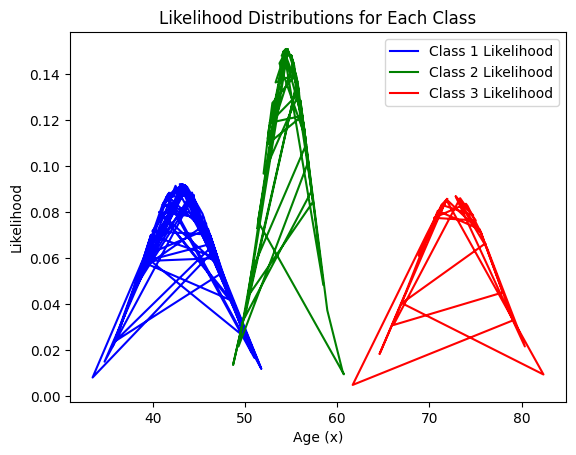

In [31]:
import matplotlib.pyplot as plt

# Calculate likelihood for class 1
likelihood_class_1 = (1 / (np.sqrt(2 * np.pi * variance_class_1))) * np.exp(-((ages_class_1 - mean_class_1) ** 2) / (2 * variance_class_1))

# Calculate likelihood for class 2
likelihood_class_2 = (1 / (np.sqrt(2 * np.pi * variance_class_2))) * np.exp(-((ages_class_2 - mean_class_2) ** 2) / (2 * variance_class_2))

# Calculate likelihood for Class 3
likelihood_class_3 = (1 / (np.sqrt(2 * np.pi * variance_class_3))) * np.exp(-((ages_class_3 - mean_class_3) ** 2) / (2 * variance_class_3))

plt.plot(ages_class_1, likelihood_class_1, label='Class 1 Likelihood', color='blue')
plt.plot(ages_class_2, likelihood_class_2, label='Class 2 Likelihood', color='green')
plt.plot(ages_class_3, likelihood_class_3, label='Class 3 Likelihood', color='red')
plt.xlabel('Age (x)')
plt.ylabel('Likelihood')
plt.legend()
plt.title('Likelihood Distributions for Each Class')
plt.show()

In [34]:
print(len(ages_class_1))
print(len(ages_class_2))
print(len(ages_class_3))

70
50
30


In [40]:
print(likelihood_class_1)

[0.05532079 0.07923145 0.09090539 0.04635397 0.08725451 0.08651095
 0.01666107 0.09206179 0.01497788 0.0872654  0.05821323 0.04067078
 0.09137051 0.05361447 0.02382932 0.06570462 0.09148607 0.0591194
 0.06685889 0.07004657 0.06029596 0.0080819  0.06369056 0.03983361
 0.04168539 0.05830722 0.06637516 0.04773092 0.07263758 0.0610119
 0.02576193 0.06961528 0.08714937 0.01190679 0.05605004 0.07012596
 0.07167502 0.09133328 0.01928754 0.08844362 0.04907929 0.09151225
 0.0119833  0.09209548 0.09117797 0.0432345  0.02158863 0.05437442
 0.09196493 0.09208271 0.08360371 0.07745712 0.07994588 0.04088554
 0.04225556 0.08001484 0.0559561  0.09193175 0.08716313 0.02481767
 0.08836718 0.0858368  0.0830223  0.05470468 0.07487728 0.08324968
 0.09161733 0.05864368 0.05995177 0.06989048]


In [39]:
print(class_priors[1])

0.4666666666666667


In [47]:
evidence_normalization_class_1 = []
for likelihood in likelihood_class_1:
  evidence = likelihood*class_priors[1]
  print(f"evidence of {likelihood} is {evidence}")
  evidence_normalization_class_1.append(evidence)
  likelihood = likelihood+1

evidence of 0.05532078884316314 is 0.025816368126809465
evidence of 0.07923144612835331 is 0.036974674859898214
evidence of 0.09090538712452297 is 0.042422513991444054
evidence of 0.04635396532938364 is 0.0216318504870457
evidence of 0.08725451153032797 is 0.04071877204748638
evidence of 0.0865109508134571 is 0.04037177704627998
evidence of 0.01666106840392135 is 0.007775165255163296
evidence of 0.09206179315222623 is 0.04296217013770558
evidence of 0.014977882866023239 is 0.006989678670810845
evidence of 0.08726539944249725 is 0.04072385307316539
evidence of 0.05821323456490977 is 0.027166176130291226
evidence of 0.040670779556182264 is 0.01897969712621839
evidence of 0.09137050663216931 is 0.042639569761679014
evidence of 0.05361447071989654 is 0.02502008633595172
evidence of 0.023829321925058006 is 0.011120350231693736
evidence of 0.06570461998762674 is 0.03066215599422581
evidence of 0.09148607217222511 is 0.042693500347038386
evidence of 0.059119397866483986 is 0.02758905233769252

In [ ]:
for x in train_data['Age']:


In [64]:
unnormalized_posterior_class_1 = likelihood_class_1 * class_priors[1]
unnormalized_posterior_class_2 = likelihood_class_2 * class_priors[2]
unnormalized_posterior_class_3 = likelihood_class_3 * class_priors[3]


evidence_class_1 = np.sum(unnormalized_posterior_class_1)
evidence_class_2 = np.sum(unnormalized_posterior_class_2)
evidence_class_3 = np.sum(unnormalized_posterior_class_3)

# Calculate the normalized posterior probabilities for each class
posterior_class_1 = unnormalized_posterior_class_1 / evidence_class_1
posterior_class_2 = unnormalized_posterior_class_2 / evidence_class_2
posterior_class_3 = unnormalized_posterior_class_3 / evidence_class_3


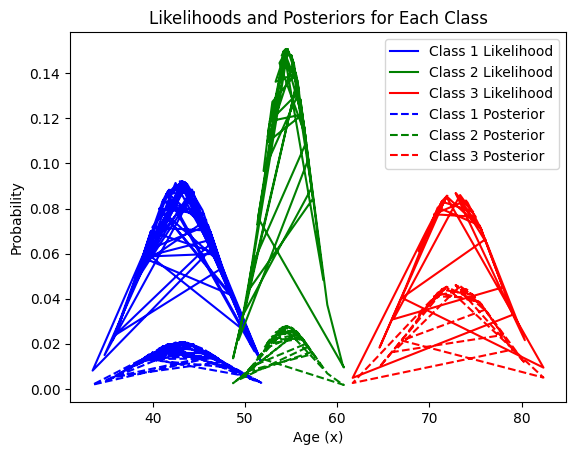

In [66]:
import matplotlib.pyplot as plt

# Plot the likelihoods
plt.plot(age_values_1, likelihood_class_1, label='Class 1 Likelihood', color='blue')
plt.plot(age_values_2, likelihood_class_2, label='Class 2 Likelihood', color='green')
plt.plot(age_values_3, likelihood_class_3, label='Class 3 Likelihood', color='red')

# Plot the posteriors
plt.plot(age_values_1, posterior_class_1, label='Class 1 Posterior', linestyle='--', color='blue')
plt.plot(age_values_2, posterior_class_2, label='Class 2 Posterior', linestyle='--', color='green')
plt.plot(age_values_3, posterior_class_3, label='Class 3 Posterior', linestyle='--', color='red')

# Set labels and title
plt.xlabel('Age (x)')
plt.ylabel('Probability')
plt.legend()
plt.title('Likelihoods and Posteriors for Each Class')

# Show the plot
plt.show()

In [79]:
true_labels = train_data['Class'].valuesnum_classes = 3

confusion_matrix_3x3 = np.zeros((num_classes, num_classes), dtype=int)

for i in range(len(true_labels)):
    true_class = true_labels[i] - 1
    predicted_class = np.argmax([posterior_class_1[i], posterior_class_2[i], posterior_class_3[i]])
    confusion_matrix_3x3[true_class][predicted_class] += 1

print("Confusion Matrix (Training Data):\n", confusion_matrix_3x3)


IndexError: ignored